In [41]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np
import sys
import seaborn as sn

In [10]:
sys.path

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib',
 'C:\\Users\\David\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0',
 '',
 'C:\\Users\\David\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages',
 'C:\\Users\\David\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32',
 'C:\\Users\\David\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\David\\AppData\\Local\\Packages\\PythonSoftwareFounda

In [11]:
sys.path.append(r'c:\users\oycc2\python\lib\site-packages')

In [12]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
y_train[0]

5

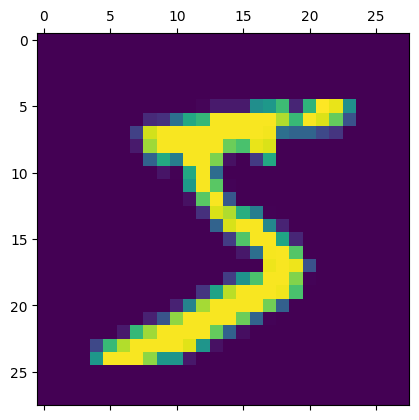

In [14]:
plt.matshow(X_train[0])


In [15]:
y_test[0]

7

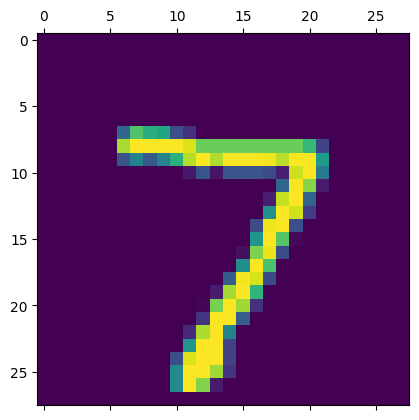

In [16]:
plt.matshow(X_test[0])

In [17]:
X_train[0].shape

(28, 28)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
y_train[:9]


array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [20]:
len(X_train)

60000

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [22]:
X_train_flattened.shape


(60000, 784)

In [23]:
X_test_flattened.shape

(10000, 784)

In [24]:
len(y_train)

60000

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.8171 - loss: 0.7120
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9142 - loss: 0.3089
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.9219 - loss: 0.2866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.9240 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9260 - loss: 0.2655


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9153 - loss: 0.3052


[0.2675907015800476, 0.9257000088691711]

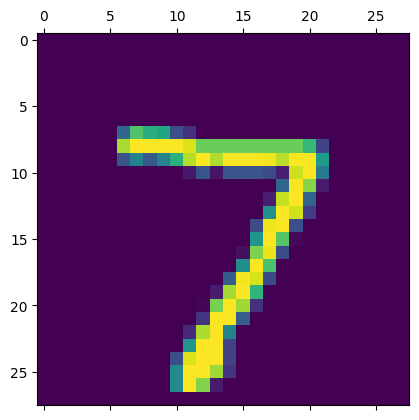

In [27]:
plt.matshow(X_test[0])

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


array([1.4202664e-02, 3.1626254e-07, 6.6888385e-02, 9.5214373e-01,
       2.5042088e-03, 1.2596872e-01, 1.7139739e-06, 9.9979264e-01,
       1.1157248e-01, 6.1991024e-01], dtype=float32)

In [29]:
y_test[1]

2

In [30]:
np.argmax(y_predicted[1])

2

In [31]:
len(y_predicted)

10000

In [32]:
print(y_predicted[1])


[3.7735885e-01 5.3252098e-03 9.9893957e-01 4.1293538e-01 6.7277917e-10
 8.4764153e-01 8.7658966e-01 8.7698284e-13 1.6987826e-01 5.6364535e-09]


In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [35]:
len(y_test)

10000

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(158.22222222222223, 0.5, 'Truth')

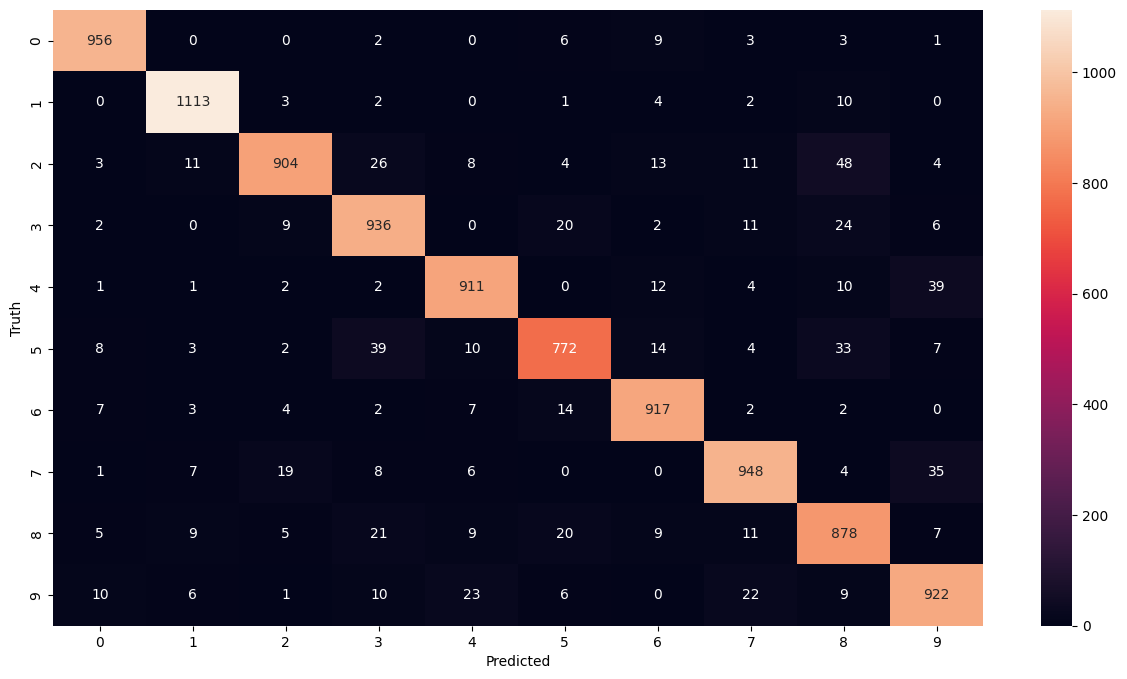

In [42]:
plt.figure(figsize = (15,8))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
tf.config.list_physical_devices()